In [1]:
!pip install datasets neattext joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
from datasets import load_dataset

dataset = load_dataset("emotion")
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotion_labels = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
train_df['emotion'] = train_df['label'].map(emotion_labels)
test_df['emotion'] = test_df['label'].map(emotion_labels)

In [6]:
train_df.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [7]:
print("Train Dataset Info:")
print(train_df.info())

print("Test Dataset Info:")
print(test_df.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   label    16000 non-null  int64 
 2   emotion  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB
None
Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   label    2000 non-null   int64 
 2   emotion  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB
None


In [8]:
print("\nEmotion Distribution on Training Dataset:")
print(train_df['emotion'].value_counts())

print("\nEmotion Distribution on Testing Dataset:")
print(test_df['emotion'].value_counts())


Emotion Distribution on Training Dataset:
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

Emotion Distribution on Testing Dataset:
emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64


<ipython-input-9-c253cf0ced0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=train_df, order=train_df['emotion'].value_counts().index, palette='viridis')


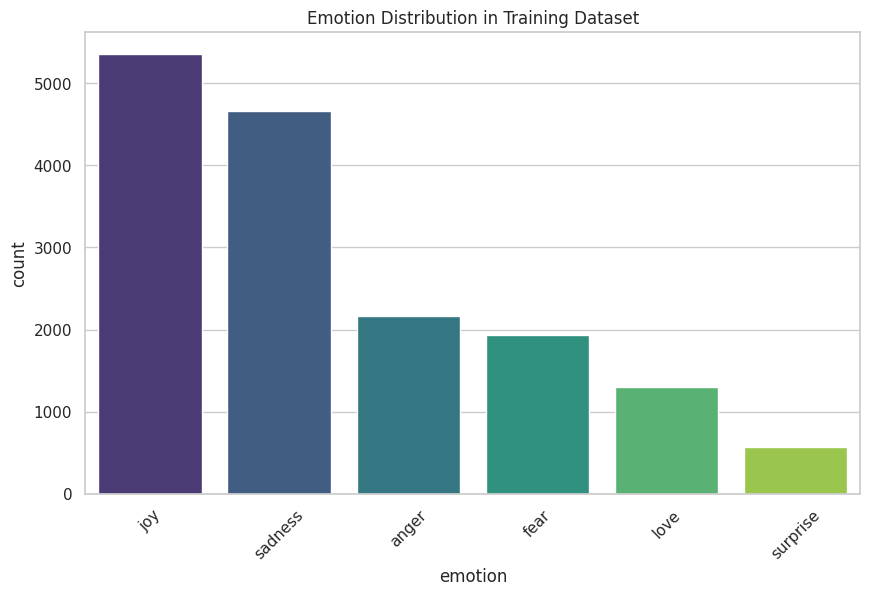

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=train_df, order=train_df['emotion'].value_counts().index, palette='viridis')
plt.title(f'Emotion Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-2d1fd56920b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=test_df, order=test_df['emotion'].value_counts().index, palette='viridis')


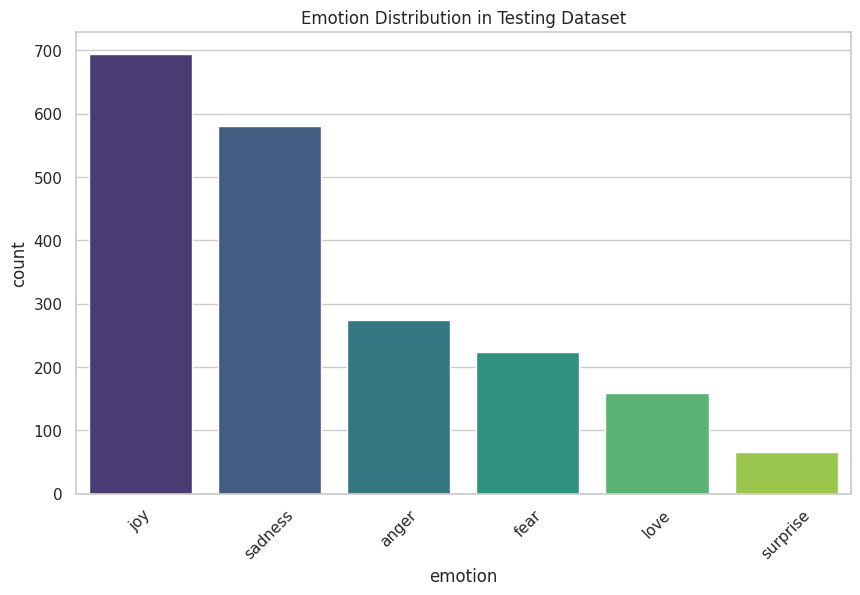

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=test_df, order=test_df['emotion'].value_counts().index, palette='viridis')
plt.title(f'Emotion Distribution in Testing Dataset')
plt.xticks(rotation=45)
plt.show()

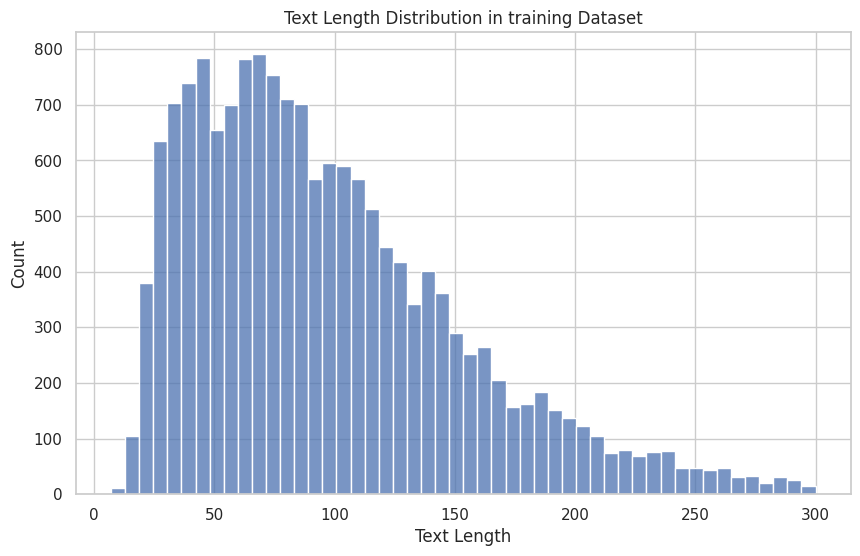

In [11]:
# Text length analysis
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50)
plt.title(f'Text Length Distribution in training Dataset')
plt.xlabel('Text Length')
plt.show()

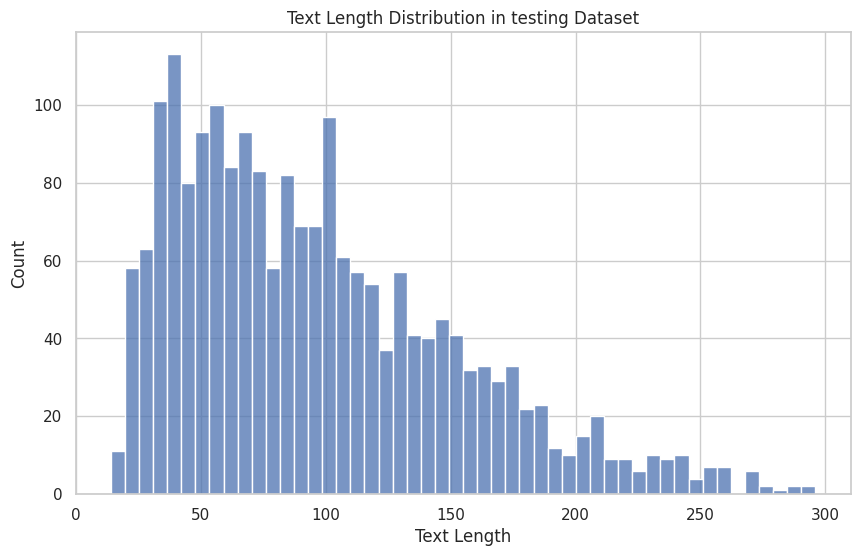

In [12]:
test_df['text_length'] = test_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test_df['text_length'], bins=50)
plt.title(f'Text Length Distribution in testing Dataset')
plt.xlabel('Text Length')
plt.show()

In [13]:
import neattext.functions as nfx

def preprocess_text(text):
    text = nfx.remove_urls(text)
    text = nfx.remove_punctuations(text)
    text = nfx.remove_special_characters(text)
    text = nfx.remove_stopwords(text)
    return text.lower()

train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

In [14]:
X_train = train_df['clean_text']
y_train = train_df['label']
X_test = test_df['clean_text']
y_test = test_df['label']

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

model_name = 'SVM'
model = SVC(kernel='linear', probability=True, class_weight='balanced')

In [36]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('classifier', model)
])

In [37]:
param_grid = {'classifier__C': [0.1, 1, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [38]:
# Train model
print(f"\nTraining {model_name}...with hyperparameter training")
grid_search.fit(X_train, y_train)


Training SVM...with hyperparameter training


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            kernel='linear',
                                            probability=True))]),
             n_jobs=-1, param_grid={'classifier__C': [0.1, 1, 10]},
             scoring='accuracy')

In [39]:
print(f"Best C: {grid_search.best_params_['classifier__C']}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best C: 1
Best Cross-Validation Accuracy: 0.8925


In [40]:
# Predict on test set
y_pred = grid_search.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Test Accuracy: {accuracy:.4f}")
print(f"\nClassification Report for {model_name}:")
report = classification_report(y_test, y_pred, target_names=emotion_labels.values(), output_dict=True)
print(classification_report(y_test, y_pred, target_names=emotion_labels.values()))

SVM Test Accuracy: 0.8955

Classification Report for SVM:
              precision    recall  f1-score   support

     sadness       0.97      0.91      0.94       581
         joy       0.96      0.88      0.92       695
        love       0.71      0.96      0.81       159
       anger       0.87      0.92      0.89       275
        fear       0.88      0.84      0.86       224
    surprise       0.60      0.86      0.71        66

    accuracy                           0.90      2000
   macro avg       0.83      0.90      0.86      2000
weighted avg       0.91      0.90      0.90      2000



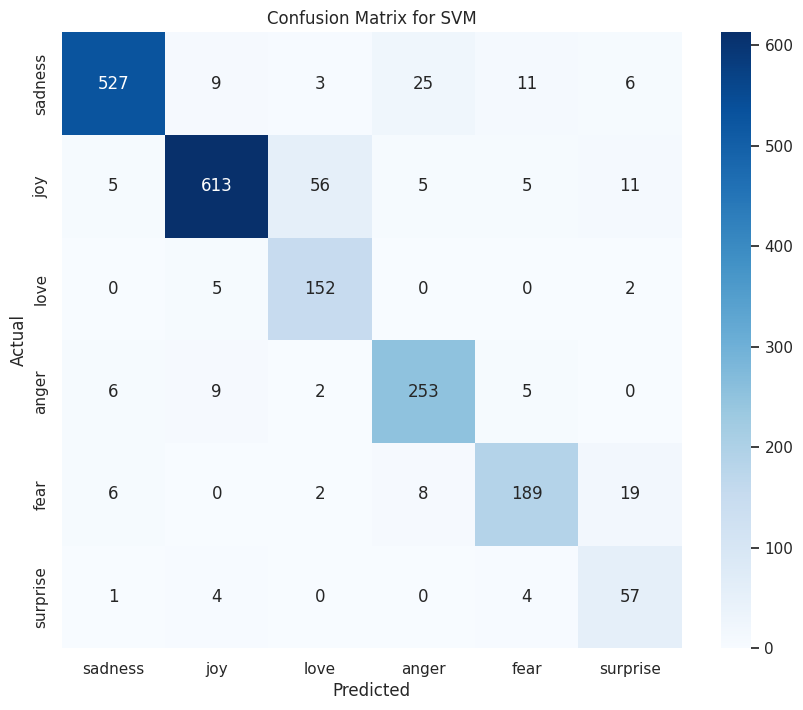

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels.values(),
            yticklabels=emotion_labels.values())
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusion_matrix_svm.png')
plt.close()

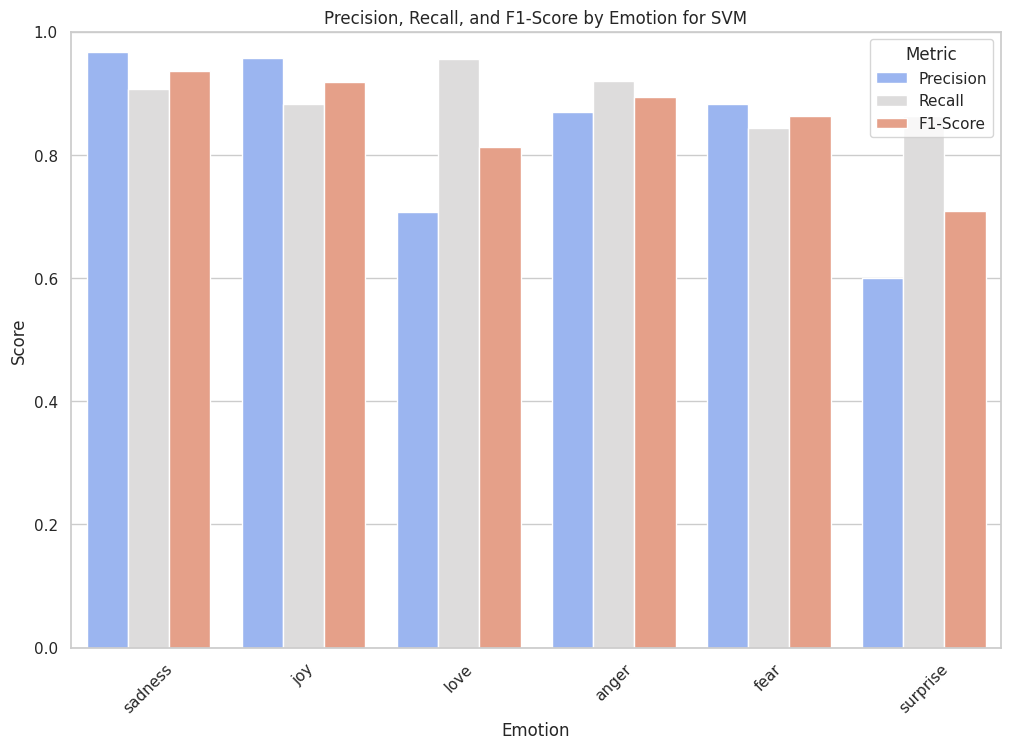

In [46]:
metrics_df = pd.DataFrame({
    'Emotion': [],
    'Metric': [],
    'Score': []
})
for emotion in emotion_labels.values():
    metrics_df = pd.concat([metrics_df, pd.DataFrame({
        'Emotion': [emotion] * 3,
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Score': [
            report[emotion]['precision'],
            report[emotion]['recall'],
            report[emotion]['f1-score']
        ]
    })], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Emotion', y='Score', hue='Metric', data=metrics_df, palette='coolwarm')
plt.title('Precision, Recall, and F1-Score by Emotion for SVM')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
plt.savefig('metrics_bar_plot_svm.png')
plt.close()

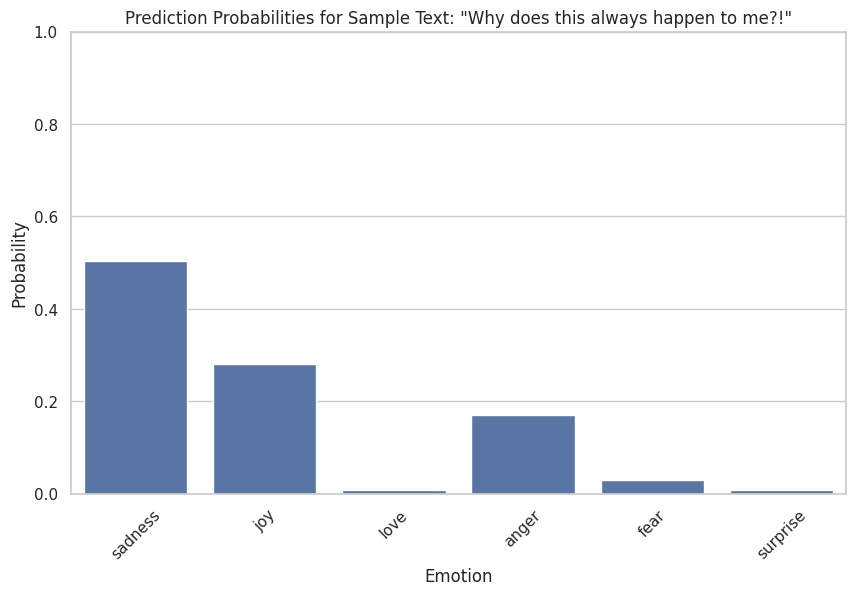

In [49]:
sample_text = "Why does this always happen to me?!"
clean_sample = preprocess_text(sample_text)
probas = grid_search.predict_proba([clean_sample])[0]
probas_df = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Probability': probas
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Emotion', y='Probability', data=probas_df)
plt.title(f'Prediction Probabilities for Sample Text: "{sample_text}"')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
plt.savefig('prediction_probabilities_svm.png')
plt.close()

In [50]:
# Save model
joblib.dump(pipeline, '/content/drive/MyDrive/emotion_detection/modelssvm_model.pkl')

['/content/drive/MyDrive/emotion_detection/modelssvm_model.pkl']

In [51]:
# Demo: Predict emotion for sample text
prediction = grid_search.predict([clean_sample])[0]
print(f"{model_name} predicts '{sample_text}' as: {emotion_labels[prediction]}")

# Save results
results_df = pd.DataFrame({
    'Model': [model_name],
    'Accuracy': [accuracy]
})
results_df.to_csv('svm_results.csv', index=False)

SVM predicts 'Why does this always happen to me?!' as: sadness
